In [136]:
import pandas as pd
import os
import numpy as np


In [92]:
os.chdir('/Users/umaobbani/Downloads/Data+Science+in+Python+-+Data+Prep+&+EDA/Data/test_files')

In [93]:
customers=pd.read_csv('maven_music_customers.csv')

In [94]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [95]:
listening_history=pd.read_excel('maven_music_listening_history.xlsx')

In [96]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [97]:
customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [98]:
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [99]:
listening_history.shape

(505, 5)

In [100]:
audio=pd.read_excel('maven_music_listening_history.xlsx', sheet_name=1)

In [101]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [102]:
sessions=pd.read_excel('maven_music_listening_history.xlsx', sheet_name=2)

In [103]:
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [104]:
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [105]:
sessions.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [106]:
customers['Member Since']=pd.to_datetime(customers['Member Since'], errors='coerce')

/var/folders/wn/ct0g9r2x7j794g93g8f_jd280000gn/T/ipykernel_30742/1405160978.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Member Since']=pd.to_datetime(customers['Member Since'], errors='coerce')


In [107]:
customers.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate            object
Discount?                    object
Cancellation Date            object
dtype: object

In [108]:
customers['Cancellation Date']=pd.to_datetime(customers['Cancellation Date'] , errors='coerce')

/var/folders/wn/ct0g9r2x7j794g93g8f_jd280000gn/T/ipykernel_30742/2140120158.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Cancellation Date']=pd.to_datetime(customers['Cancellation Date'] , errors='coerce')


In [109]:
customers.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate            object
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

In [110]:
customers['Subscription Rate'] = pd.to_numeric(
    customers['Subscription Rate']
        .astype(str)                           # ← Force to string
        .str.replace('$', '', regex=False)
        .str.replace(',', '')
        .str.strip(),
    errors='coerce'
)




In [111]:
customers.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

In [112]:
customers.tail()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
25,7224,Melody Fitzgerald,Email: fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01
26,7401,Reed Murphy,Email: murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01
27,7579,Jazz Drummond,Email: drumming.jazz@email.com,2023-05-15,Basic (Ads),2.99,NaN,NaT
28,7581,Lyric Keys,Email: keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03
29,7583,Melody Singer,Email: melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-01


In [113]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [114]:
customers.shape

(30, 8)

In [115]:
customers.describe()

,Customer ID,Member Since,Subscription Rate,Cancellation Date
count,30.000000,30,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,NaN


In [116]:
customers.describe()

,Customer ID,Member Since,Subscription Rate,Cancellation Date
count,30.000000,30,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,NaN


In [117]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [118]:
audio.shape

(17, 4)

In [119]:
customers[customers['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [120]:
customers[['Subscription Plan','Subscription Rate']].drop_duplicates()

,Subscription Plan,Subscription Rate
0,Basic (Ads),2.99
1,NaN,2.99
6,Premium (No Ads),9.99
15,Premium (No Ads),99.99
21,Premium (No Ads),7.99


In [126]:
customers[['Subscription Plan','Subscription Rate']].drop_duplicates()

,Subscription Plan,Subscription Rate
0,Basic (Ads),2.99
1,NaN,2.99
6,Premium (No Ads),9.99
15,Premium (No Ads),99.99
21,Premium (No Ads),7.99


In [122]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [125]:
customers['Subscription Rate'].isna().sum()

np.int64(0)

In [124]:
customers.isna().any(axis=1).sum()

np.int64(24)

In [128]:
customers['Subscription Plan']=customers['Subscription Plan'].fillna('Basic (Ads)')

In [129]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT


In [133]:
customers[['Customer ID', 'Discount?']].tail()

,Customer ID,Discount?
25,7224,Yes
26,7401,Yes
27,7579,NaN
28,7581,Yes
29,7583,Yes


In [134]:
customers['Discount?'].value_counts()

Discount?
Yes    7
Name: count, dtype: int64

In [135]:
customers.value_counts()

Customer ID  Customer Name      Email                               Member Since  Subscription Plan  Subscription Rate  Discount?  Cancellation Date
6824         Greta Groove       Email: groovy.greta@email.com       2023-05-01    Premium (No Ads)   7.99               Yes        2023-06-02           1
7087         Harmony Heart      Email: heartfelt.harmony@email.com  2023-05-01    Premium (No Ads)   7.99               Yes        2023-06-02           1
7224         Melody Fitzgerald  Email: fitzgerald.melody@email.com  2023-05-08    Premium (No Ads)   7.99               Yes        2023-06-01           1
7401         Reed Murphy        Email: murphy.reed.music@email.com  2023-05-08    Premium (No Ads)   7.99               Yes        2023-06-01           1
7581         Lyric Keys         Email: keysoflyric@email.com        2023-05-16    Premium (No Ads)   7.99               Yes        2023-06-03           1
7583         Melody Singer      Email: melodic.singer@email.com     2023-05-16   

In [137]:
customers['Discount?']=np.where(customers['Discount?']=='Yes' ,1,0)

In [138]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [139]:
customers = customers.rename(columns={'Discount?': 'Discount'})

In [140]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [140]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [140]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [141]:
customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,0.430183,NaN


In [142]:
customers.describe(include=[np.number])

,Customer ID,Subscription Rate,Discount
count,30.000000,30.000000,30.000000
mean,6276.333333,8.556667,0.233333
std,814.255587,17.517840,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,99.990000,1.000000


In [145]:
customers[customers['Subscription Rate']>7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [146]:
customers.iloc[15,5]=9.99

In [147]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [149]:
customers['Member Since'].max()

Timestamp('2023-05-16 00:00:00')

In [150]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [151]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [153]:
listening_history['Audio Type'].value_counts()

Audio Type
Song       463
Podcast     42
Name: count, dtype: int64

In [154]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [157]:
audio['Genre'].value_counts()

Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [160]:
audio['Genre']=np.where(audio.Genre=='Pop Music','Pop',audio['Genre'])

In [168]:
audio['Genre'].value_counts()

Genre
Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [162]:
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [163]:
sessions['Session Log In Time'].max()

Timestamp('2023-05-31 06:03:00')

3.Duplicate Rows

In [166]:
customers[customers.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date


In [167]:
customers[customers.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date


In [169]:
listening_history[listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [170]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [171]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


4. Outliers

In [172]:
customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,0.430183,NaN


In [173]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [175]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [174]:
sessions.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


5. Creating New columns 

In [176]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [177]:
# Create a 'Cancelled' column
customers['Cancelled']=np.where(customers['Cancellation Date'].notna(),1,0)
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [178]:
# Create an updated Email column without Email:Portion
customers['Email']=customers['Email'].str[6:]
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


6.EDA

In [179]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [181]:
# View the customers who cancelled
customers[customers['Cancellation Date'].notna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02,1
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01,1
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1


In [183]:
# How long were customers members before they cancelled?
(customers['Cancellation Date'] - customers['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [187]:
# Calculate the cancellation rate for those who had a discount
discount_yes=customers[customers['Discount']==1]
discount_yes


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1


In [188]:
#Cancellation rate for those who had a discount

discount_yes.Cancelled.sum() / discount_yes.Cancelled.count()

np.float64(0.8571428571428571)

In [189]:
# Calculate the cancellation rate for those who had No a discount
discount_no=customers[customers['Discount']==0]
discount_no

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


In [190]:
#Cancellation rate for those who had a No discount

discount_no.Cancelled.sum() / discount_no.Cancelled.count()

np.float64(0.30434782608695654)

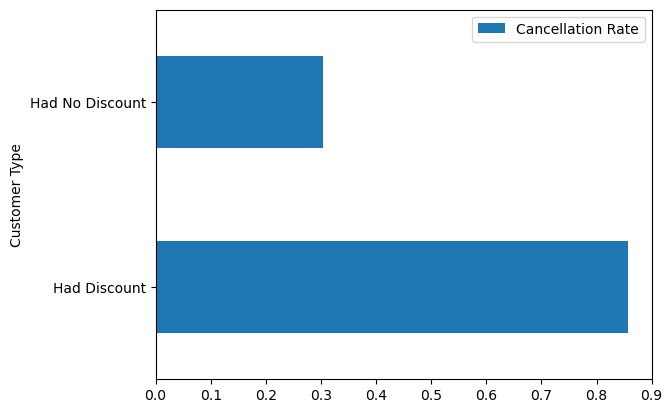

In [194]:
#Visulaise the cancellation rate for those with a discount vs without a discount--this is a good insight
pd.DataFrame([['Had Discount' ,0.8571428571428571] ,
             ['Had No Discount' ,0.30434782608695654]],
             columns=['Customer Type','Cancellation Rate']).plot.barh(x='Customer Type',y='Cancellation Rate',);
             




Better understand the customers's listening histories:

Join together he listening history and audio tables
How many listening sessions did each customers have in the past 3 months?
what were the most popular generes that customers listened do?


In [195]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [197]:
# Split the ID in the Audio so the column can be joined with other tables 
audio_clean=pd.DataFrame(audio.ID.str.split('-').to_list()).rename(columns={0:'Type',1:'Audio ID'})
audio_clean.head()





,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105


In [199]:
# Add the new fields to the original audio table
audio_all=pd.concat([audio_clean, audio],axis=1)
audio_all.head()



,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [ ]:
# if you try to join on the Audio ID , you will get an error
## df = listening_history.merge(audio_all , how='left' , on='Audio ID')


In [200]:
# Check the data type of Audio ID in the audio table
audio_all.dtypes

Type          object
Audio ID      object
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [201]:
audio_all['Audio ID']=audio_all['Audio ID'].astype('int')

In [202]:
audio_all.dtypes

Type          object
Audio ID       int64
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [203]:
audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [204]:
df=listening_history.merge(audio_all , how='left' , on='Audio ID')
df

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52
...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song,Song-111,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,Podcast,Podcast-201,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,Song,Song-110,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,Song,Song-108,Chase the Dream,Hip Hop,4


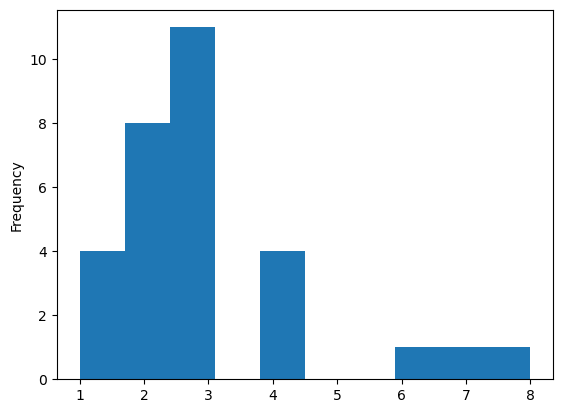

In [208]:
# The number of listening sessions that each customer had in the past 3 months
df.groupby('Customer ID')['Session ID'].nunique().plot.hist();

In [209]:
#The most popular genre that customers listend to
df.Genre.value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

6.Prep for Modeliing

In [ ]:
Create a DataFrame that is ready for modelling with each row representing a customer and the following numeric , non-null columns:
1. Customer ID 
2.Whethere a customer cancelled or not
3.Whether a customer received a discount or not 
4.The number of listening sessions
5.Percent of listening history consistening of Pop
6.Percent of listening history consisting of Padcast

In [212]:
# Create a DataFrame ready for modelling
model_df=customers[['Customer ID', 'Cancelled','Discount']]

In [213]:
model_df

,Customer ID,Cancelled,Discount
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0
5,5404,1,0
6,5581,0,0
7,5759,1,0
8,5761,0,0
9,5763,0,0


In [217]:
# Calculate the number of Listening sessions for each customers
number_of_sessions=df.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()

In [215]:
number_of_sessions

,Number of Sessions
Customer ID,
5001,8
5002,4
5004,1
5267,7
5338,4
5404,1
5581,3
5759,2
5761,3


In [218]:
number_of_sessions=df.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()

In [219]:
number_of_sessions

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4
5,5404,1
6,5581,3
7,5759,2
8,5761,3
9,5763,6


In [220]:
# Add it to the modeling dataframe
model_df=model_df.merge(number_of_sessions , how='left', on='Customer ID')
model_df.head()

,Customer ID,Cancelled,Discount,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [221]:
#Calculate dummy variables for each genre
pd.get_dummies(df.Genre)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
500,False,False,False,True,False,False
501,True,False,False,False,False,False
502,False,False,True,False,False,False
503,False,False,True,False,False,False


In [224]:
#Calculate dummy variables for each genre
pd.concat([df['Customer ID'],pd.get_dummies(df.Genre)],axis=1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,False,False,False,False,True,False
1,5001,False,False,False,False,True,False
2,5001,False,False,False,False,True,False
3,5001,False,False,False,False,True,False
4,5001,False,False,False,False,True,False
...,...,...,...,...,...,...,...
500,7579,False,False,False,True,False,False
501,6588,True,False,False,False,False,False
502,5763,False,False,True,False,False,False
503,5763,False,False,True,False,False,False


In [225]:
#Group i by customer
genres = pd.concat([df['Customer ID'],pd.get_dummies(df.Genre)],axis=1).groupby('Customer ID').sum().reset_index()

In [226]:
genres

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0
5,5404,0,0,0,0,8,0
6,5581,0,0,0,0,0,5
7,5759,0,0,0,0,15,0
8,5761,0,0,0,0,0,5
9,5763,0,0,11,0,20,0


In [227]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [230]:
#Add a column for total songs / podcasts listend to
total_audio=listening_history.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()

In [231]:
total_audio

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18
5,5404,8
6,5581,5
7,5759,15
8,5761,5
9,5763,31


In [232]:
# Create a master audio table to calculate percentages
df_audio=genres.merge(total_audio, how='left',on='Customer ID')
df_audio

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18
5,5404,0,0,0,0,8,0,8
6,5581,0,0,0,0,0,5,5
7,5759,0,0,0,0,15,0,15
8,5761,0,0,0,0,0,5,5
9,5763,0,0,11,0,20,0,31


In [238]:
# Percent Pop
model_df['Percent Podcasts']=((df_audio['Comedy']+df_audio['True Crime']) / df_audio['Total Audio'])*100
model_df



,Customer ID,Cancelled,Discount,Number of Sessions,Percent Pop,Percent Podcasts
0,5001,0,0,8,56.666667,0.000000
1,5002,0,0,4,0.000000,0.000000
2,5004,1,0,1,100.000000,0.000000
3,5267,0,0,7,51.111111,0.000000
4,5338,0,0,4,0.000000,0.000000
5,5404,1,0,1,100.000000,0.000000
6,5581,0,0,3,0.000000,100.000000
7,5759,1,0,2,100.000000,0.000000
8,5761,0,0,3,0.000000,100.000000
9,5763,0,0,6,64.516129,0.000000


In [234]:
#Percent pop
model_df['Percent Pop']=df_audio['Pop'] /df_audio['Total Audio']*100
model_df.head()

,Customer ID,Cancelled,Discount,Number of Sessions,Percent Pop
0,5001,0,0,8,56.666667
1,5002,0,0,4,0.000000
2,5004,1,0,1,100.000000
3,5267,0,0,7,51.111111
4,5338,0,0,4,0.000000


In [ ]:
Visulaize the relationships in the modeling DataFrame using a pair plot:
1.What are some of your observations?
2.What variables might do a good job predictng customer cancellation?


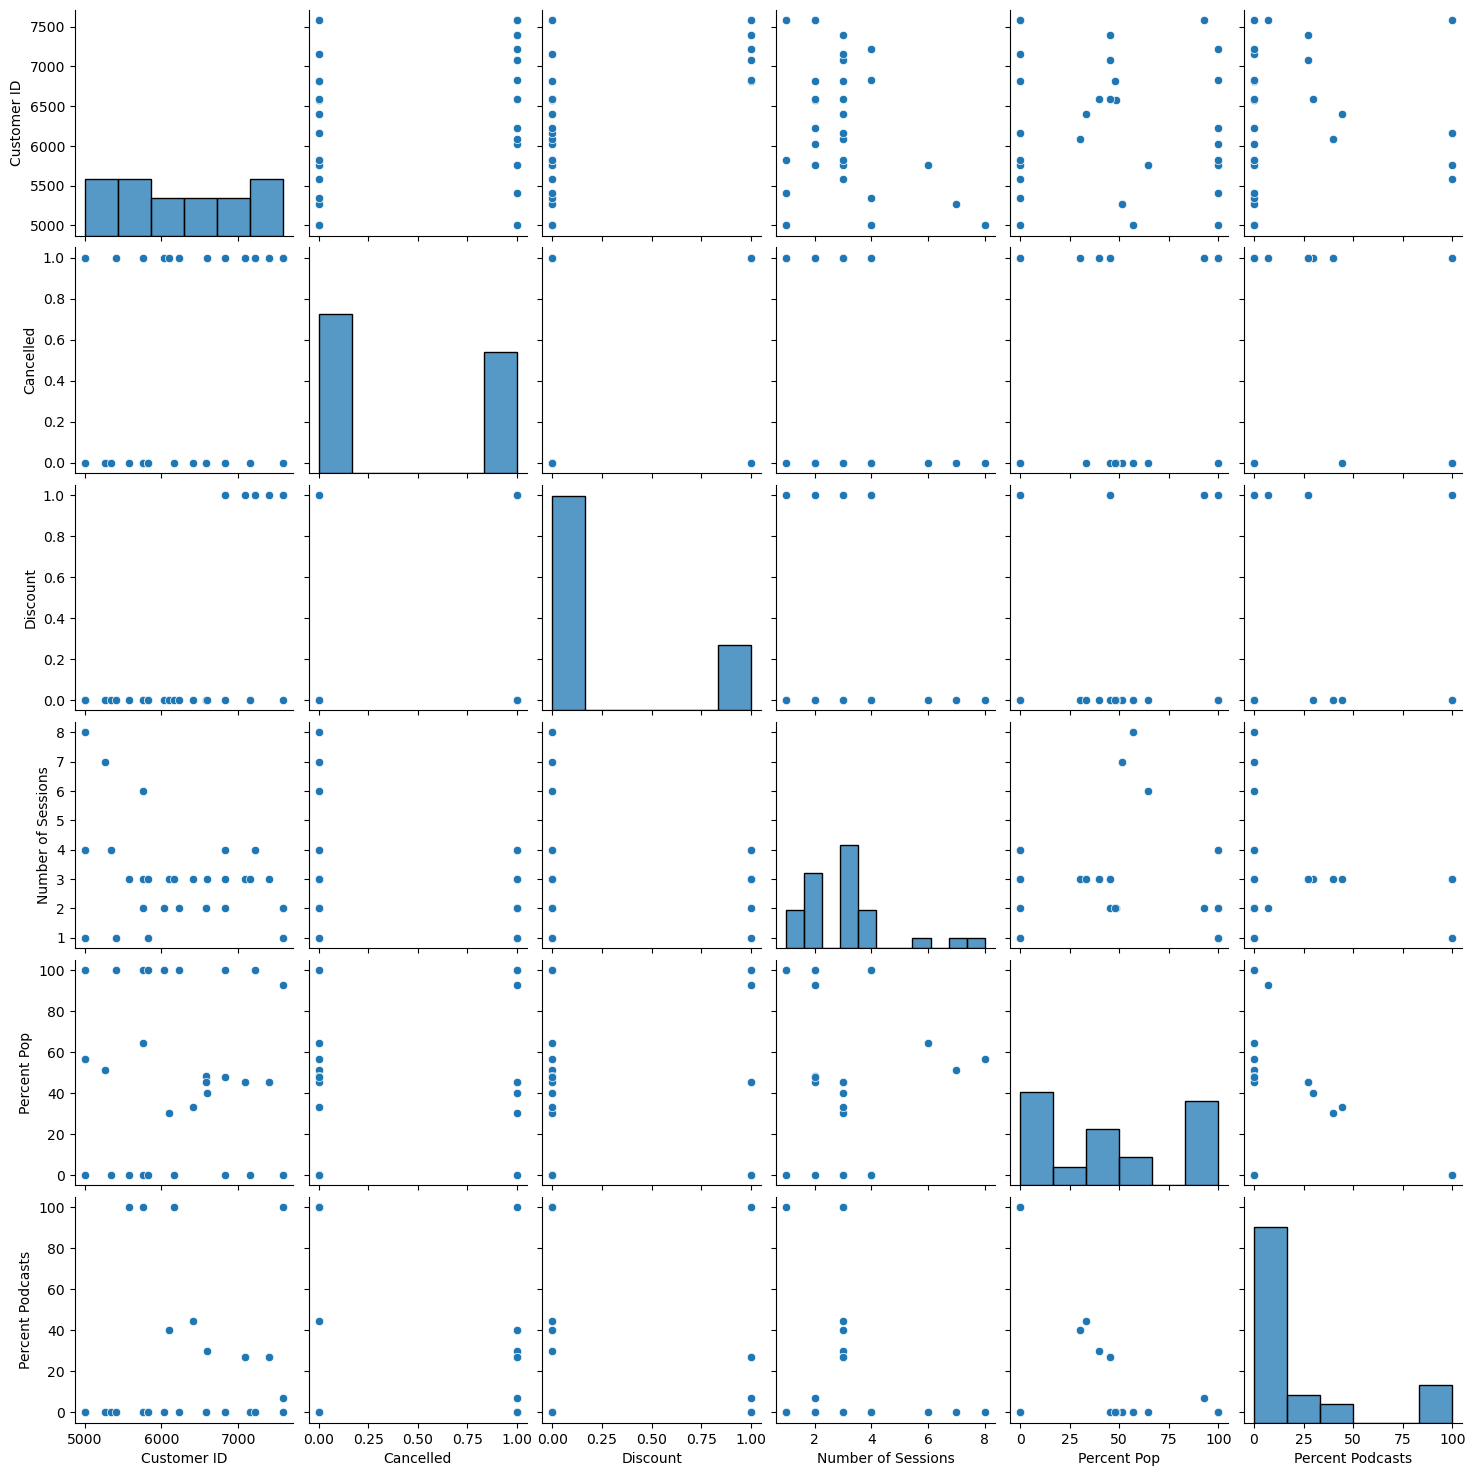

In [243]:
sns.pairplot(model_df);

In [240]:
import seaborn as sns


In [244]:
model_df.corr()

,Customer ID,Cancelled,Discount,Number of Sessions,Percent Pop,Percent Podcasts
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.076129,0.083083
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.585630,-0.035414
Discount,0.648514,0.471825,1.000000,-0.048877,0.112675,0.062938
Number of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.131156,-0.125459
Percent Pop,-0.076129,0.585630,0.112675,-0.131156,1.000000,-0.487193
Percent Podcasts,0.083083,-0.035414,0.062938,-0.125459,-0.487193,1.000000


In [ ]:
# Observations
## A discount is correlated with a cancellation
## The more listening sessions , the fewer cancellations
## The more pop music , the more cancellations
##Podcast listening history seems unrelated to cancellations